## Handwriting OCR using Document AI and Python

In this tutorial, we will use Document AI's general processor (Document Processor). For learning purpose, we use example cards available in Google search.

We will follow this [official documentation](https://cloud.google.com/document-ai/docs/enterprise-document-ocr) as reference.

#### 1. Setup Environment

In [1]:
import os
import json
from google.cloud import documentai_v1 as documentai
from google.oauth2 import service_account
from mimetypes import guess_type
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
project_id = os.environ['PROJECT_ID']
location = os.environ['REGION']
processor_id = os.environ['HANDWRITING_PROCESSOR_ID']

In [4]:
service_account_path = '../norse.json' # change this path

In [5]:
credentials = service_account.Credentials.from_service_account_file(service_account_path)   

#### 2. Create Extraction Function

In [6]:
def online_process(
    project_id: str,
    location: str,
    processor_id: str,
    file_path: str,
    file_name: str,
) -> documentai.Document:
    """
    Processes a document using the Document AI Online Processing API.
    """

    opts = {"api_endpoint": f"{location}-documentai.googleapis.com"}

    # Instantiates a client by passing credentials and the API endpoint
    documentai_client = documentai.DocumentProcessorServiceClient(client_options=opts, credentials=credentials)

    # The full resource name of the processor, e.g.:
    # projects/project-id/locations/location/processor/processor-id
    # You must create new processors in the Cloud Console first
    resource_name = documentai_client.processor_path(project_id, location, processor_id)

    # Read the file into memory
    with open(file_path, "rb") as file:
        file_content = file.read()

    # Guess the MIME type based on the file name
    mime_type, _ = guess_type(file_name)
    if mime_type is None:
        raise ValueError("Unable to determine the file's MIME type")

    # Load Binary Data into Document AI RawDocument Object
    raw_document = documentai.RawDocument(content=file_content, mime_type=mime_type)

    # Configure the process request
    request = documentai.ProcessRequest(name=resource_name, raw_document=raw_document)

    # Use the Document AI client to process the sample form
    result = documentai_client.process_document(request=request)

    return result

#### 3. Run The Extraction

##### Example A

In [7]:
import PIL.Image

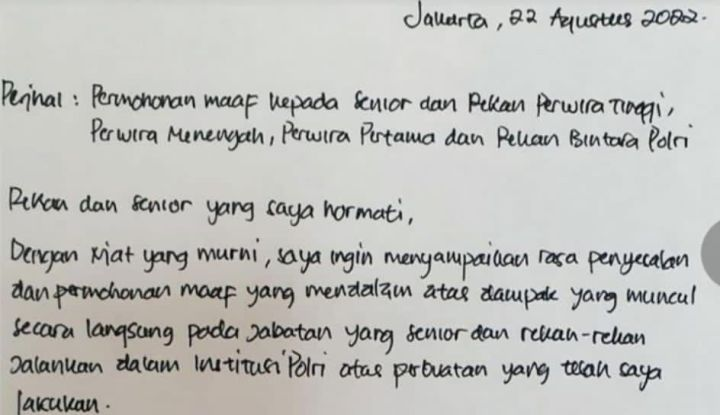

In [14]:
# load example id card
file_path = './examples/handwriting3.jpg'
# Extract file name from file path
file_name = os.path.basename(file_path)

PIL.Image.open(file_path)

In [15]:
response = online_process(project_id, location, processor_id, file_path, file_name)

In [16]:
print(response.document.text)

Jakarta, 22 Aqustus 2022.
Perihal : Permohonan maaf kepada Senior dan Pekan Perwira Tinggi,
Perwira Menengah, Perwira Pertama dan Pehan Bintara Polri
Pekan dan senior yang saya hormati,
Dengan Miat yang murni, saya ingin menyampainian rasa penyecalan
dan permohonan maaf yang mendalam atas dampak yang muncul
secara langsung pada Jabatan yang senior dan rekan-relan
Jalankan dalam Institusi Polri atas perovatan yang telah saya
lakukan.



##### Example B

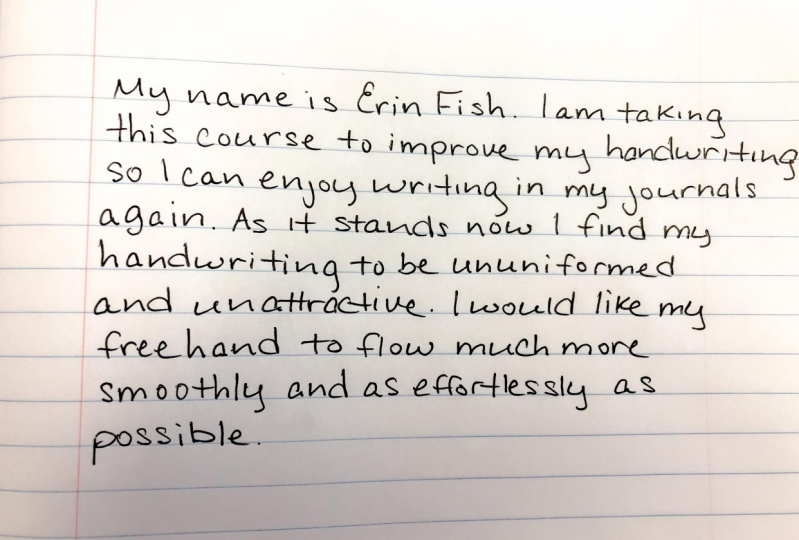

In [17]:
# load example id card
file_path = './examples/handwriting2.jpg'
# Extract file name from file path
file_name = os.path.basename(file_path)

PIL.Image.open(file_path)

In [18]:
response = online_process(project_id, location, processor_id, file_path, file_name)

In [19]:
from IPython.display import Markdown, display

In [20]:
display(
    Markdown(response.document.text)
)

My name is Erin Fish. I am taking
handwriting
this course to improve my
so I can enjoy writing in my journals.
again. As 
it stands now I find my
handwriting to be ununiformed
and unattractive. I would like my
free hand to flow much more
smoothly and as effortlessly as
possible.
